In [1]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import numpy as np
from numpy import expand_dims
import random

In [2]:
#This block is what will be used to generate a new image
#using the respective parameters

datagen = ImageDataGenerator(
        rotation_range = 180,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [3]:
#This function takes in the number of images that need to be created
#to balance a class and the name of the class

def generate_data(number_of_images, which_class):
    for i in range(0, number_of_images):
        rand = random.choice([x for x in os.listdir(f'data/tomato/{which_class}')]) #Picks random image to use as base image
        img = load_img(f'data/tomato/{which_class}/{rand}') #Loads the selected image
        x = img_to_array(img) #converts the image to an array
        x = x.reshape((1,) + x.shape) #reshapes the image
        for batch in datagen.flow(x, batch_size = 1, #augments and saves the image as a new jpeg image
                                  save_to_dir = f'augmented_data/{which_class}', 
                                  save_prefix = f'{which_class}{i}', 
                                  save_format = 'jpeg'):
            break

### Visualizing Current Class Imbalance

In [4]:
#Established directory which I will look in

directory = 'data/tomato'

In [5]:
#Countrs the number of images in each class

class_counts = []

for i in os.listdir(directory):
    class_counts.append(len(os.listdir(directory + '/' + i)))

In [6]:
class_counts

[2127, 1000, 1591, 1909, 952, 1771, 373, 1676, 1404, 5357]

In [7]:
#List of all the classes

classes = os.listdir(directory)

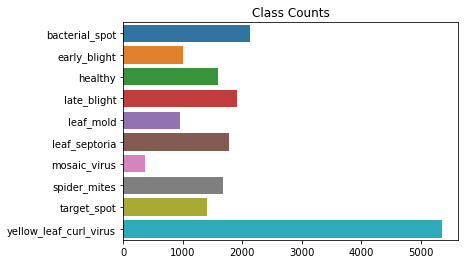

In [8]:
#creates a barplot comparing the coutns of each class

sns.barplot(x = class_counts, y = classes)
plt.title('Class Counts');


#Saving the image

plt.savefig('class_counts.jpg')

### Generating Data To Balance Classes

In [144]:
#This how many augmented images need to be added to each class to have balanced classes

diffs = [3000 - x for x in class_counts]

In [147]:
#This for loop goes through each class except the last one
#(because the last one doesn't need any more data) and generates
#the necessary amount of images to bring the number of images to 3000

for i in range(0,9):
    generate_data(diffs[i], classes[i])